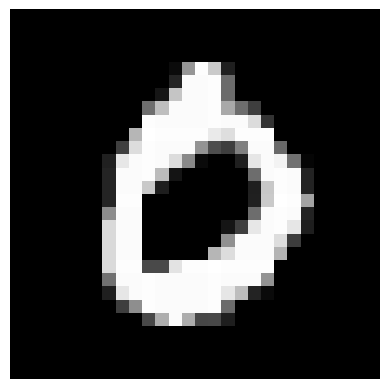

In [14]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\INTEL\OneDrive\Desktop\IPCV_PRACS\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\INTEL\OneDrive\Desktop\IPCV_PRACS\data"
os.makedirs(output_dir, exist_ok=True)

# for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
#     image_array = pixel_values.reshape(28, 28).astype(np.uint8)
#     img = Image.fromarray(image_array)
#     img.save(f"{output_dir}/{label}_{idx}.png")
#     if idx >= 10: 
#         break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




## Region Growing Segmentation

Text(0.5, 1.0, 'Region Growinng')

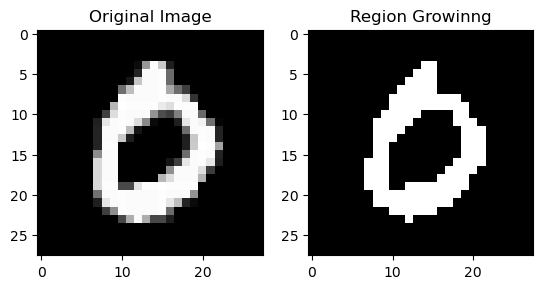

In [15]:
def region_growing(img, thresh):
    r, c = img.shape
    seed = (random.randint(0, r - 1), random.randint(0, c - 1))

    seg = np.zeros_like(img, dtype=np.uint8)
    seed_x, seed_y = seed
    seg[seed_x, seed_y] = 255
    region_mean = img[seed_x, seed_y]

    growing = True
    pixels = [(seed_x, seed_y)]

    while growing:
        new_pixels = []
        for x, y in pixels:
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                nx, ny = x + dx, y + dy

                if 0 <= nx < r and 0 <= ny < c and seg[nx, ny] == 0:
                    if abs(int(img[nx, ny]) - region_mean) < thresh:
                        seg[nx, ny] = 255
                        new_pixels.append((nx, ny))

        if new_pixels:
            region_mean = np.mean([img[x, y] for x, y in new_pixels])
            pixels = new_pixels
        else:
            growing = False

    return seg


image_array = np.array(random_img)
final = region_growing(image_array,60)

plt.subplot(1,2,1)
plt.imshow(random_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(final, cmap='gray')
plt.title("Region Growinng")

### Split and Merge

Text(0.5, 1.0, 'Split and Merge')

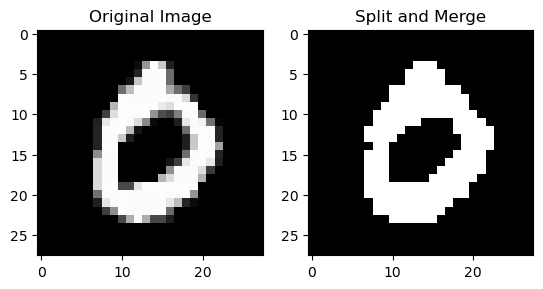

In [16]:
def merge_regions(regions):
    while True:
        merged = False
        new_regions = []
        while regions:
            current = regions.pop()
            was_merged = False

            for idx, region in enumerate(new_regions):
                if abs(np.mean(region) - np.mean(current)) < 5:
                    new_regions[idx] = np.vstack([region, current])
                    was_merged = True
                    merged = True
                    break

            if not was_merged:
                new_regions.append(current)

        regions = new_regions
        if not merged:
            break
    return regions


def split_and_merge(image, num_regions):
    r, c = image.shape
    step = r // num_regions

    regions = [np.arange(i, min(i + step, r)) for i in range(0, r, step)]
    regions = merge_regions(regions)

    output_image = np.zeros_like(image, dtype=np.uint8)
    for region in regions:
        for row in region:
            output_image[row, :] = ((np.mean(image[region, :]) - image[row, :]) < 10) * 255

    return output_image



split_and_merge_image = split_and_merge(image_array,2)

plt.subplot(1,2,1)
plt.imshow(random_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(split_and_merge_image, cmap='gray')
plt.title("Split and Merge")